In [23]:
import time 
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [24]:
# Initialize a list of tickers for the stock
tickers = ["LYV", "AMC", "AMZN", "NFLX", "DRI", "RUTH", "DAL", "AAL"]
stock_names = ["Live Nation Entertainment", "AMC", "Amazon", "Netflix",
              "Darden Restaurants Inc", "Ruth's Hospitality Group", 
               "Delta Airlines", "American Airlines"]

#Define the variables
precovid_date = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid_date = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"

# Initialize an empty list to store the dataframes for each stock
dfs = []

# Fetch the data for each stock and store it in the dfs list
for ticker in tickers:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid_date}&period2={postcovid_date}&interval={interval}&events=history&includeAdjustedClose=true"
    df = pd.read_csv(query_string)
    df['Ticker'] = ticker
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime format
    dfs.append(df)

# Concatenate all the dataframes in the dfs list based on the common "Date" column
combined_df = pd.concat(dfs)

# Calculate Daily Trade Value for each stock
combined_df['Daily Trade Value'] = combined_df['Close'].astype(float) * combined_df['Volume'].astype(float)

# Rearrange columns with "Ticker" as the first column
combined_df = combined_df[['Ticker'] + [col for col in combined_df.columns if col != 'Ticker']]

#Change Datetime to Type Integer
combined_df['Date'] = pd.to_datetime(combined_df['Date']).astype(np.int64)

combined_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Trade Value
0,LYV,1420070400000000000,26.219999,26.379999,24.709999,25.110001,25.110001,2973500.0,7.466459e+07
1,LYV,1420675200000000000,25.389999,25.940001,24.440001,24.680000,24.680000,3113900.0,7.685105e+07
2,LYV,1421280000000000000,24.750000,25.120001,24.330000,24.780001,24.780001,2537000.0,6.286686e+07
3,LYV,1421884800000000000,24.950001,25.709999,24.500000,24.549999,24.549999,4677400.0,1.148302e+08
4,LYV,1422489600000000000,24.559999,24.770000,23.530001,24.389999,24.389999,6481700.0,1.580887e+08
...,...,...,...,...,...,...,...,...,...
397,JETS,1670198400000000000,18.690001,18.969999,17.920000,18.110001,18.110001,13696800.0,2.480491e+08
398,JETS,1670803200000000000,18.100000,19.150000,17.260000,17.450001,17.450001,19994100.0,3.488971e+08
399,JETS,1671408000000000000,17.469999,17.635000,16.840000,17.230000,17.230000,13120100.0,2.260593e+08
400,JETS,1672012800000000000,17.073999,17.163000,16.580000,17.080000,17.080000,12371800.0,2.113103e+08


In [25]:
#Save combined_df as csv 
FilePath = "outsource_data.csv"
combined_df.to_csv(FilePath)

In [1]:
#Define a function for making scatter plot pre-cvoid
def precovid(x_values, y_values, ticker, title=''):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    fig, ax = plt.subplots()

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    ax.plot(x_values, regress_values, color='r')

    ax.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    ax.xticks([])
    
    ax.label('2015 to 2019')
    ax.ylabel('Volume')
    ax.title(title)

    plt.savefig(f"output_data/PreCovid_{ticker}.png")
    plt.show()
    
    print(f"The r-value is: {r_value}")
    
    return fig 

In [4]:
#Define a function for making scatter plot post-covid
def postcovid(x_values, y_values, ticker, title=''):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    plt.xticks([])
    
    plt.xlabel('2020 to Present')
    plt.ylabel('Volume')
    plt.title(title)
    
    plt.savefig(f"output_data/PosCovid_{ticker}.png")
    plt.show()
    
    print(f"The r-value is: {r_value}")
    

In [28]:
#Define dataframes for pre/post covid per ticker

#precovid
precovid_amc = combined_df[(combined_df['Ticker']=='AMC') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_amzn = combined_df[(combined_df['Ticker']=='AMZN') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_nflx = combined_df[(combined_df['Ticker']=='NFLX') & (combined_df['Date'].values <= 1577750400000000000)] 

#postcovid
postcovid_amc = combined_df[(combined_df['Ticker'] == 'AMC')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_amzn = combined_df[(combined_df['Ticker'] == 'AMZN')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_nflx = combined_df[(combined_df['Ticker'] == 'NFLX')&(combined_df['Date'].values>=1577836800000000000)]


### Linear Regression Scatter Plots on Tickers PreCovid

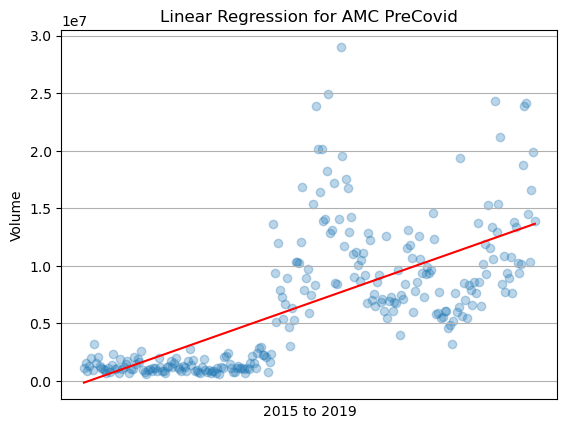

The r-value is: 0.6786404559824524


In [31]:
precovid(precovid_amc['Date'], precovid_amc['Volume'], "AMC", title='Linear Regression for AMC PreCovid')


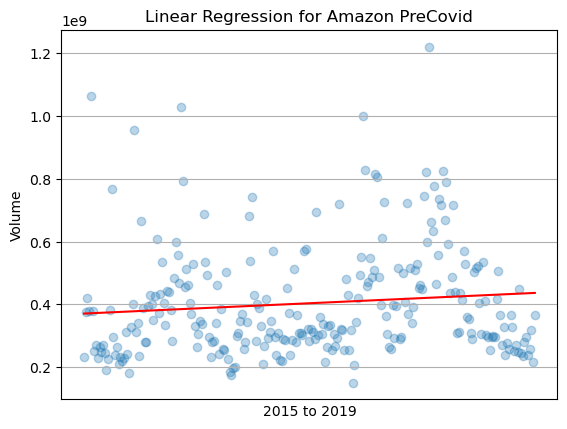

The r-value is: 0.1085300427206932


In [32]:
precovid(precovid_amzn['Date'], precovid_amzn['Volume'], "AMZN", title='Linear Regression for Amazon PreCovid')


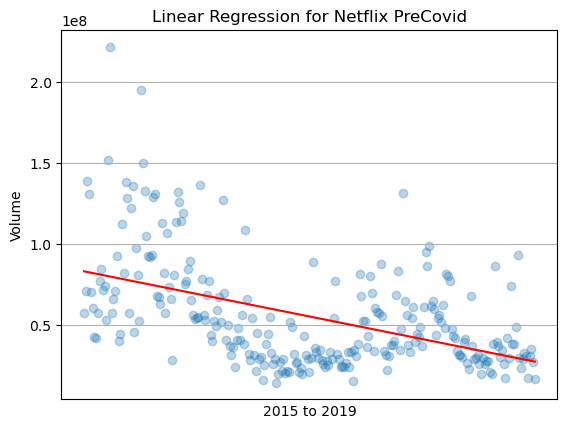

The r-value is: -0.4840255009507073


In [33]:
precovid(precovid_nflx['Date'], precovid_nflx['Volume'], "NFLX", title='Linear Regression for Netflix PreCovid')


### Post Coivd Ticker Linear Regression Graphs

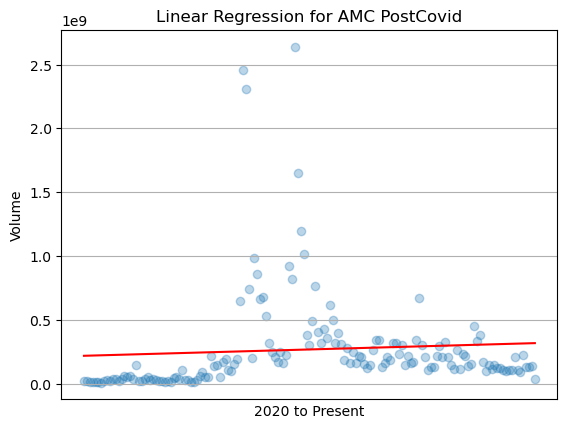

The r-value is: 0.07296152679969892


In [39]:
postcovid(postcovid_amc['Date'], postcovid_amc['Volume'], "AMC", title='Linear Regression for AMC PostCovid')


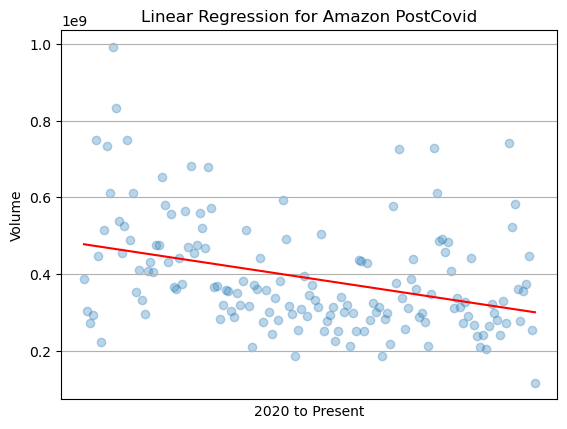

The r-value is: -0.35753579812315206


In [40]:
postcovid(postcovid_amzn['Date'], postcovid_amzn['Volume'], "AMZN", title='Linear Regression for Amazon PostCovid')


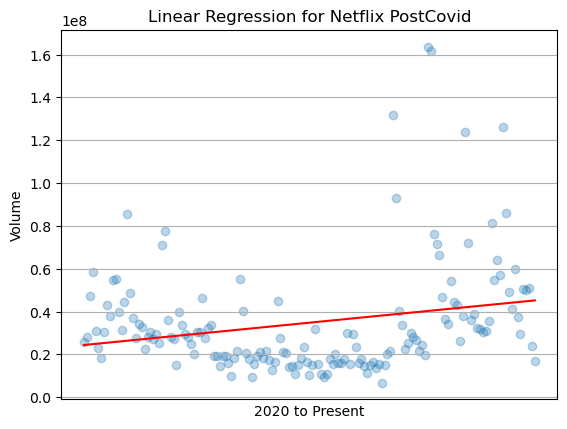

The r-value is: 0.23123111495530405


In [41]:
postcovid(postcovid_nflx['Date'], postcovid_nflx['Volume'], "NFLX", title='Linear Regression for Netflix PostCovid')
